** **
#### Step 1: Loading Data <a class="anchor\" id="load_data"></a>
** **

In [ ]:
import pandas as pd

In [ ]:
netflix = pd.read_csv("netflix.csv")
disneyplus = pd.read_csv("disneyplus.csv")

print("Banyak Dataset Netflix:", len(netflix))
print("Banyak Datset Disney Plus", len(disneyplus))

Banyak Dataset Netflix: 2500
Banyak Datset Disney Plus 2500


** **
#### Step 2: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

In [ ]:
import pandas as pd
import re
import html
import string

# Download NLTK for getting the stopwords
import nltk
nltk.download('stopwords')

# Use NLTK Corpus for stopwords dictionary
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


** **
Source of Abbrevation CSV. https://github.com/khumam/Singkatan

In [ ]:
# Download Abbreviation CSV
!wget -O abbreviation.csv \
https://raw.githubusercontent.com/khumam/Singkatan/master/src/Singkatan/Dictionary/singkatan.csv

--2025-12-25 16:22:50--  https://raw.githubusercontent.com/khumam/Singkatan/master/src/Singkatan/Dictionary/singkatan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17601 (17K) [text/plain]
Saving to: ‘abbreviation.csv’

abbreviation.csv    100%[===================>]  17.19K  --.-KB/s    in 0s      

2025-12-25 16:22:50 (104 MB/s) - ‘abbreviation.csv’ saved [17601/17601]



In [ ]:
# Import singkatan.csv for normalize abbreviation and set name colums
abbreviation = pd.read_csv("/content/abbreviation.csv", delimiter=";", names=["abbreviation", "meaning"])
abbreviation.head()

,abbreviation,meaning
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim


In [ ]:
# Set into type dictionary for abbreviation corpus
abbr_dict = dict(
    zip(abbreviation["abbreviation"], abbreviation["meaning"])
)
abbr_dict["langgan"] = "langganan"
abbr_dict

{'aamiin': 'amin ',
 'adek': 'adik ',
 'adlh': 'adalah ',
 'aer': 'air ',
 'aiskrim': 'es krim ',
 'aj': 'saja ',
 'aja': 'saja ',
 'ajah': 'saja ',
 'ajalah': 'saja ',
 'aje': 'saja ',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya ',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan ',
 'ama': 'sama ',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur ',
 'ane': 'saya ',
 'anget': 'hangat ',
 'anjeng': 'anjing ',
 'ank': 'anak ',
 'apah': 'apa ',
 'aph': 'apa',
 'apo': 'apa ',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya ',
 'asek': 'asik ',
 'ati2': 'hati-hati ',
 'atit': 'sakit ',
 'atu': 'satu ',
 'atw': 'atau ',
 'ayang': 'sayang ',
 'ayuk': 'ayo ',
 'babang': 'abang',
 'bae': 'baik ',
 'bais': 'habis',
 'bakalan': 'akan ',
 'bales': 'balas ',
 'bandingin': 'bandingkan ',
 'banget': 'sekali ',
 'bangett': 'sangat ',
 'banyakin': 'perbanyak ',
 'barengan': 'bersamaan ',
 'baryaw': 'sabar ya',
 'baso': 'bakso ',
 'bay': 'selamat tinggal

In [ ]:
from nltk.corpus import stopwords

sw_indo = set(stopwords.words("indonesian"))

custom_stopwords = [
    "nya", "sih", "dong", "nih", "deh", "lah", "kok",

    "yang", "ini", "itu", "jadi", "buat", "pas", "netflix", "terima" "kasih", "film", "nonton",

    "one", "piece", "tolong", "baik", "squid", "game", "kasih", "bintang", "gta", "san", "amdreas",

    "that", "can", "kpop", "demon", "the", "movie", "tidak apa apa", "terima kasih",

    "anime", "ranking", "kings", "fully", "integrated", "into", "pakai", "disney", "hotstar", "kirim", "email"
]

sw_indo.update(custom_stopwords)


In [ ]:
# !pip install Sastrawi

In [ ]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess(text, dictionary=abbr_dict):
    # lowercase
    text = text.lower()

    # hapus non ASCII
    text = text.encode("ascii", "ignore").decode()

    # normalisasi huruf double (asikkk -> asik)
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # hapus angka
    text = re.sub(r'\d+', ' ', text)

    # hapus punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    # tokenisasi
    words = text.split()

    # normalisasi singkatan / kata gaul
    words = [dictionary.get(w, w) for w in words]

    # Remove strip in token
    cleaned = [w.strip() for w in words]

    # hapus stopword
    words = [w for w in cleaned if w not in sw_indo]

    # hapus kata < 3 huruf
    words = [w for w in words if len(w) >= 3]

    # stemming
    words = [stemmer.stem(w) for w in words]

    # gabungkan kembali
    text = " ".join(words)

    # normalisasi whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Apply preprocess for Netflix Dataset
netflix["text_processed"] = netflix["content"].apply(preprocess)

# Apply preprocess for DisneyPlus Dataset
disneyplus["text_processed"] = disneyplus["content"].apply(preprocess)

** **
#### Step 3: Labelling the Dataset Based on  Rating <a class="anchor\" id="eda"></a>
** **

In [ ]:
# Create function labelling logic
def label_sentiment(rating):
    if rating >= 4:
        return "positif"
    elif rating == 3:
        return "netral"
    else:
        return "negatif"


In [ ]:
# Apply the function labelling Netflix dataset
netflix["sentiment"] = netflix["score"].apply(label_sentiment)

# Check distribution of sentiment labels Netflix dataset
netflix["sentiment"].value_counts()

,count
sentiment,
negatif,1617
positif,712
netral,171


In [ ]:
# Apply the function labelling DisneyPlus dataset
disneyplus["sentiment"] = disneyplus["score"].apply(label_sentiment)

# Check distribution of sentiment labels DisneyPlus dataset
disneyplus["sentiment"].value_counts()

,count
sentiment,
negatif,1972
positif,397
netral,131


** **
#### Step 4: Exploratory Analysis <a class="anchor\" id="eda"></a>
** **

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
positive_text_netflix = " ".join(
    netflix[netflix["sentiment"] == "positif"]["text_processed"]
)

negative_text_netflix = " ".join(
    netflix[netflix["sentiment"] == "negatif"]["text_processed"]
)

netral_text_netflix = " ".join(
    netflix[netflix["sentiment"] == "netral"]["text_processed"]
)

In [ ]:
positive_text_disneyplus = " ".join(
    disneyplus[disneyplus["sentiment"] == "positif"]["text_processed"]
)

negative_text_disneyplus = " ".join(
    disneyplus[disneyplus["sentiment"] == "negatif"]["text_processed"]
)

netral_text_disneyplus = " ".join(
    disneyplus[disneyplus["sentiment"] == "netral"]["text_processed"]
)

In [ ]:
def generate_wordcloud(text, title):
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=200,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

### Netflix

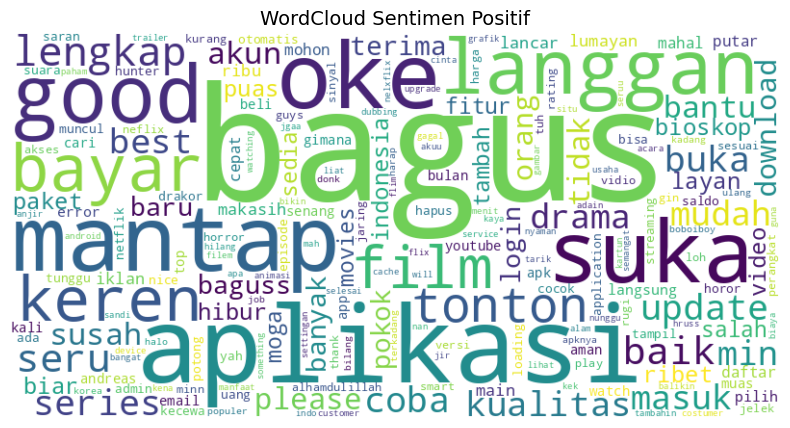

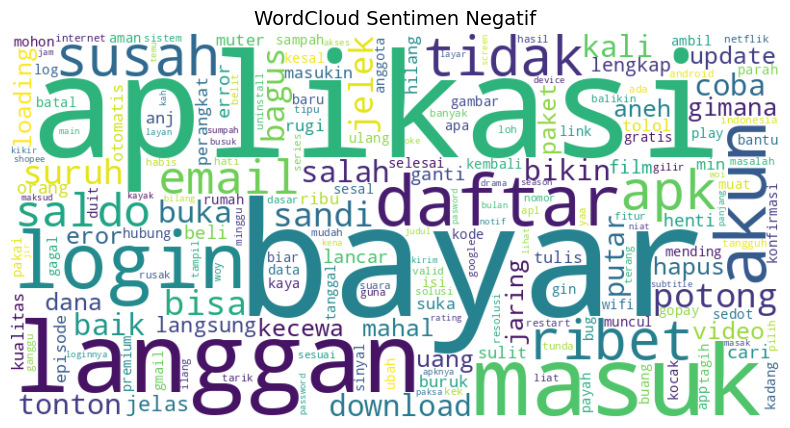

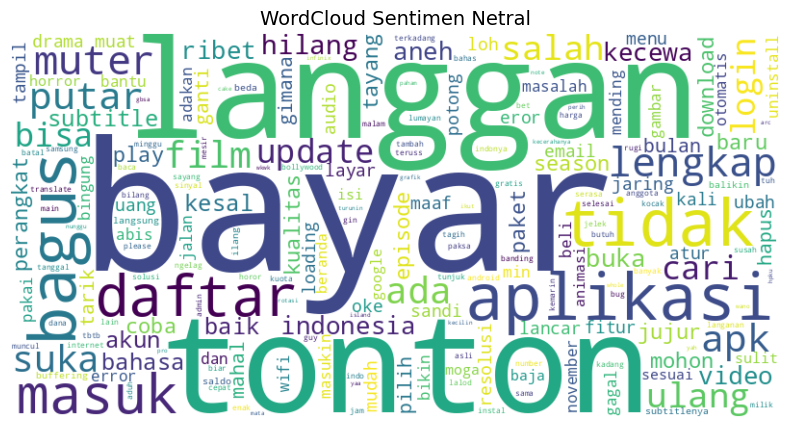

In [ ]:
generate_wordcloud(positive_text_netflix, "WordCloud Sentimen Positif")
generate_wordcloud(negative_text_netflix, "WordCloud Sentimen Negatif")
generate_wordcloud(netral_text_netflix, "WordCloud Sentimen Netral")


### Disney Plus

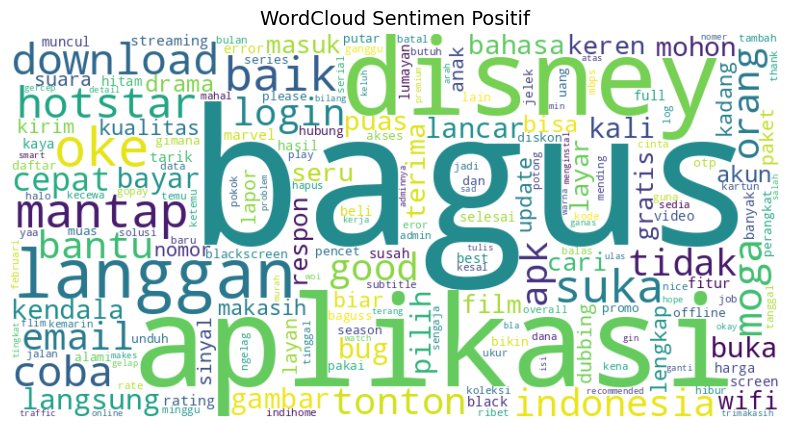

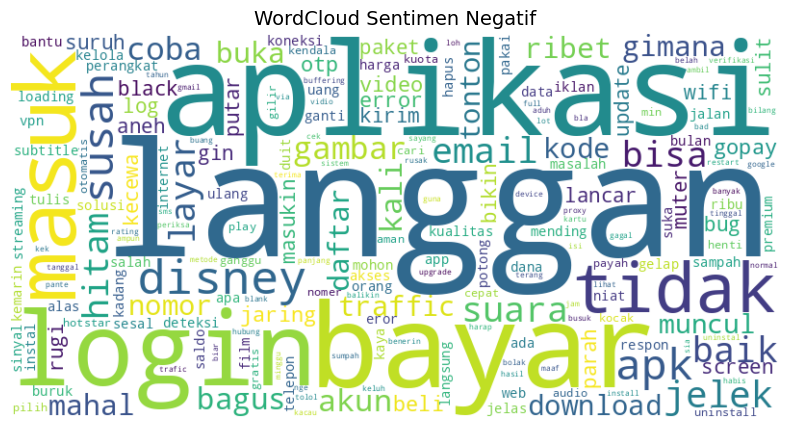

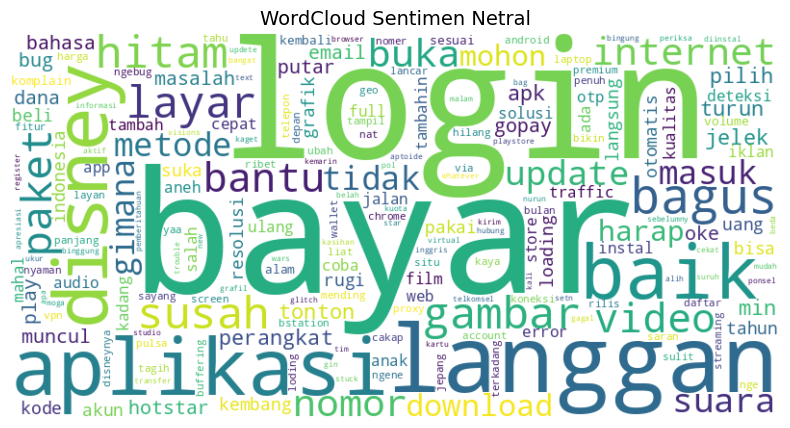

In [ ]:
generate_wordcloud(positive_text_disneyplus, "WordCloud Sentimen Positif")
generate_wordcloud(negative_text_disneyplus, "WordCloud Sentimen Negatif")
generate_wordcloud(netral_text_disneyplus, "WordCloud Sentimen Netral")

** **
#### Step 4: Set Ngram <a class="anchor\" id="eda"></a>
** **

In [ ]:
from nltk.util import ngrams
from collections import Counter

import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Create function N-gram
def extract_ngrams(texts, n, top_k=20):
    all_ngrams = []

    for text in texts:
        tokens = text.split()
        n_gram = ngrams(tokens, n)
        all_ngrams.extend(n_gram)

    return Counter(all_ngrams).most_common(top_k)

In [ ]:
positif_reviews_netflix = netflix[netflix["sentiment"] == "positif"]["text_processed"]
negatif_reviews_netflix = netflix[netflix["sentiment"] == "negatif"]["text_processed"]
netral_reviews_netflix = netflix[netflix["sentiment"] == "netral"]["text_processed"]

positif_bigram_netflix = extract_ngrams(positif_reviews_netflix, 2)
negatif_bigram_netflix = extract_ngrams(negatif_reviews_netflix, 2)
netral_bigram_netflix = extract_ngrams(netral_reviews_netflix, 2)

positif_trigram_netflix = extract_ngrams(positif_reviews_netflix, 3)
negatif_trigram_netflix = extract_ngrams(negatif_reviews_netflix, 3)
netral_trigram_netflix = extract_ngrams(netral_reviews_netflix, 3)

In [ ]:
positif_reviews_disneyplus = disneyplus[disneyplus["sentiment"] == "positif"]["text_processed"]
negatif_reviews_disneyplus = disneyplus[disneyplus["sentiment"] == "negatif"]["text_processed"]
netral_reviews_disneyplus = disneyplus[disneyplus["sentiment"] == "netral"]["text_processed"]

positif_bigram_disneyplus = extract_ngrams(positif_reviews_disneyplus, 2)
negatif_bigram_disneyplus = extract_ngrams(negatif_reviews_disneyplus, 2)
netral_bigram_disneyplus = extract_ngrams(netral_reviews_disneyplus, 2)

positif_trigram_disneyplus = extract_ngrams(positif_reviews_disneyplus, 3)
negatif_trigram_disneyplus = extract_ngrams(negatif_reviews_disneyplus, 3)
netral_trigram_disneyplus = extract_ngrams(netral_reviews_disneyplus, 3)

In [ ]:
# Create function convert N-gram to dataframe
def ngram_to_df(ngram_list, ngram_name):
    df = pd.DataFrame(ngram_list, columns=[ngram_name, "Frekuensi"])
    df[ngram_name] = df[ngram_name].apply(lambda x: " ".join(x))
    return df

In [ ]:
# Create function plot N-gram
def plot_ngram_bar(df, title, ngram_col, top_k=10):
    df = df.head(top_k)

    plt.figure(figsize=(10, 5))
    plt.barh(df[ngram_col], df["Frekuensi"])
    plt.xlabel("Frekuensi")
    plt.ylabel(ngram_col)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


## Bigram Netflix

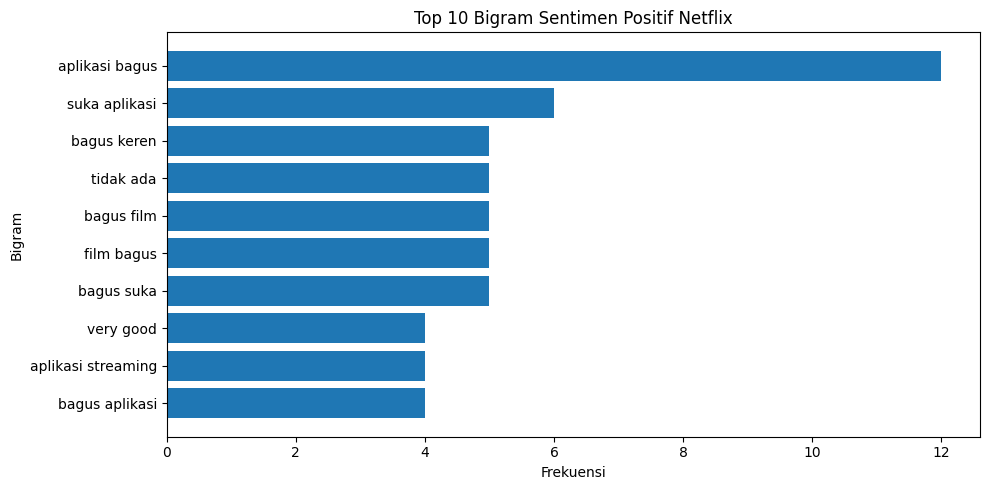

In [ ]:
positif_bigram_df = ngram_to_df(positif_bigram_netflix, "Bigram")
plot_ngram_bar(
    positif_bigram_df,
    "Top 10 Bigram Sentimen Positif Netflix",
    "Bigram"
)

## Trigram Netflix

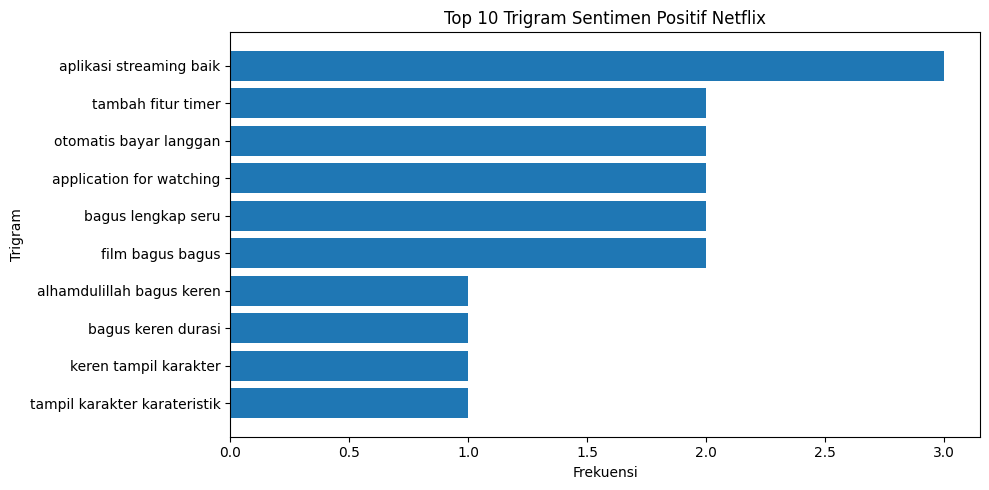

In [ ]:
positif_trigram_df = ngram_to_df(positif_trigram_netflix, "Trigram")
plot_ngram_bar(
    positif_trigram_df,
    "Top 10 Trigram Sentimen Positif Netflix",
    "Trigram"
)

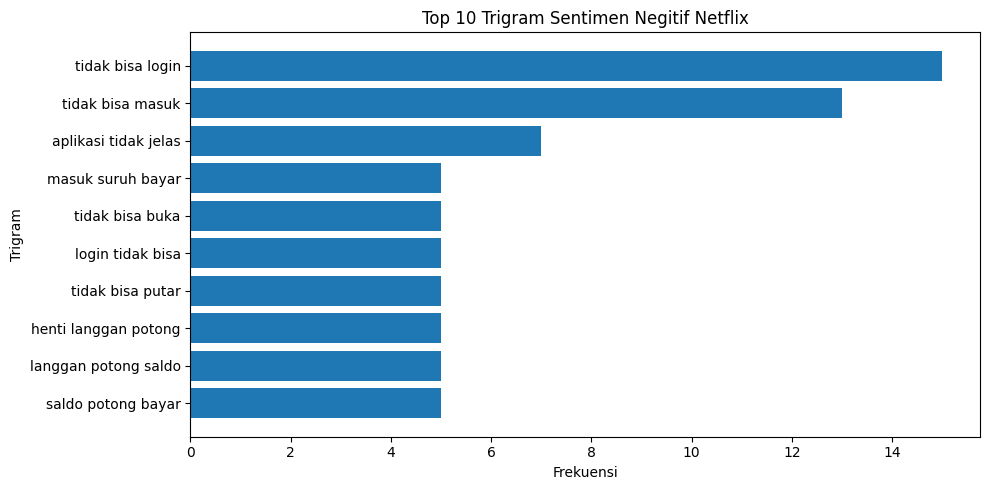

In [ ]:
negatif_trigram_df = ngram_to_df(negatif_trigram_netflix, "Trigram")
plot_ngram_bar(
    negatif_trigram_df,
    "Top 10 Trigram Sentimen Negitif Netflix",
    "Trigram"
)

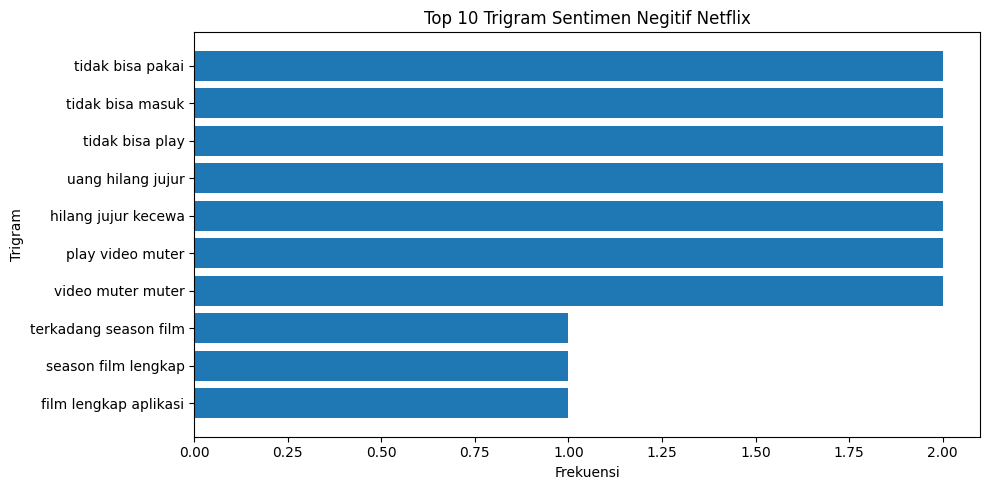

In [ ]:
netral_trigram_df = ngram_to_df(netral_trigram_netflix, "Trigram")
plot_ngram_bar(
    netral_trigram_df,
    "Top 10 Trigram Sentimen Negitif Netflix",
    "Trigram"
)

## Bigram Disney Plus

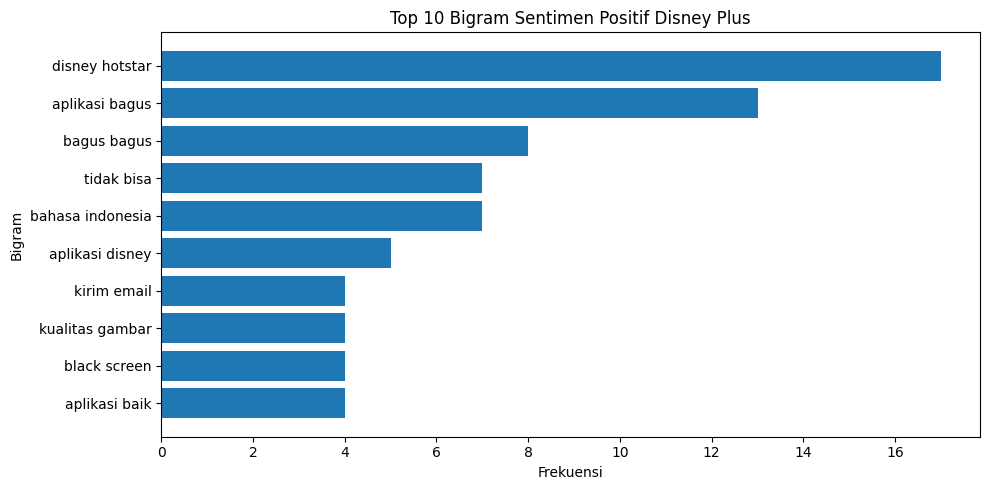

In [ ]:
positif_bigram_df = ngram_to_df(positif_bigram_disneyplus, "Bigram")
plot_ngram_bar(
    positif_bigram_df,
    "Top 10 Bigram Sentimen Positif Disney Plus",
    "Bigram"
)

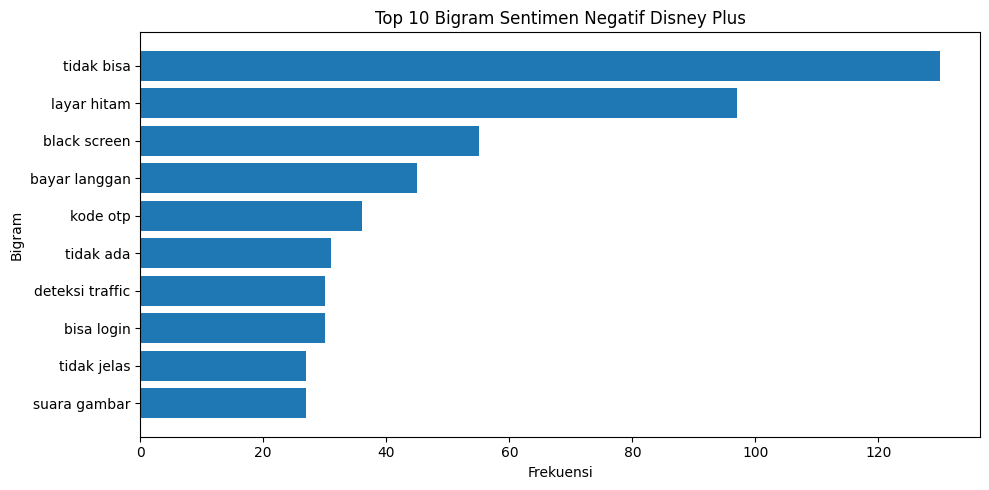

In [ ]:
negatif_bigram_df = ngram_to_df(negatif_bigram_disneyplus, "Bigram")
plot_ngram_bar(
    negatif_bigram_df,
    "Top 10 Bigram Sentimen Negatif Disney Plus",
    "Bigram"
)

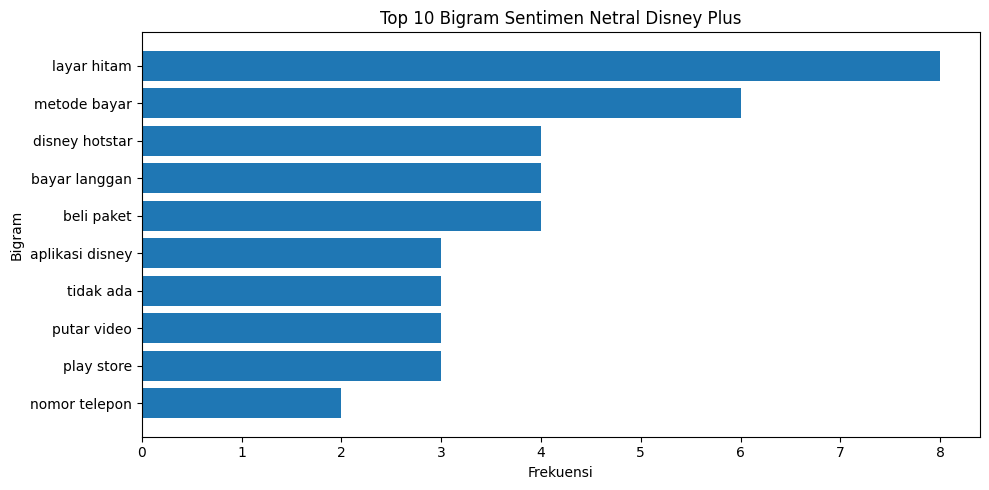

In [ ]:
netral_bigram_df = ngram_to_df(netral_bigram_disneyplus, "Bigram")
plot_ngram_bar(
    netral_bigram_df,
    "Top 10 Bigram Sentimen Netral Disney Plus",
    "Bigram"
)

## Trigram Disney Plus

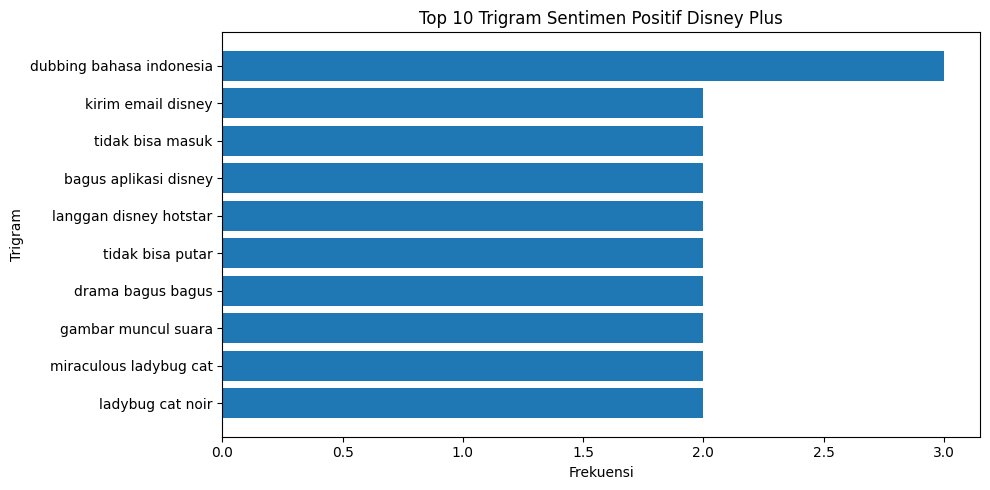

In [ ]:
positif_trigram_df = ngram_to_df(positif_trigram_disneyplus, "Trigram")
plot_ngram_bar(
    positif_trigram_df,
    "Top 10 Trigram Sentimen Positif Disney Plus",
    "Trigram"
)

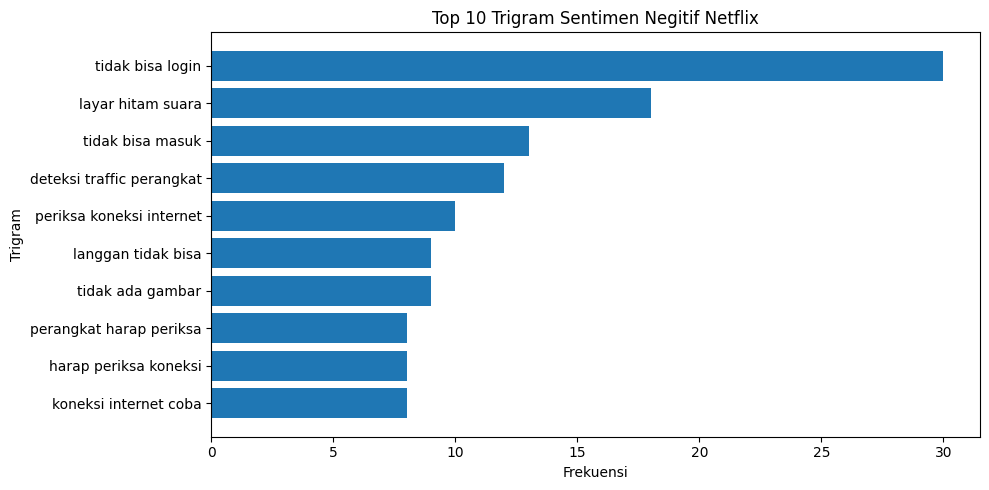

In [ ]:
negatif_trigram_df = ngram_to_df(negatif_trigram_disneyplus, "Trigram")
plot_ngram_bar(
    negatif_trigram_df,
    "Top 10 Trigram Sentimen Negitif Netflix",
    "Trigram"
)

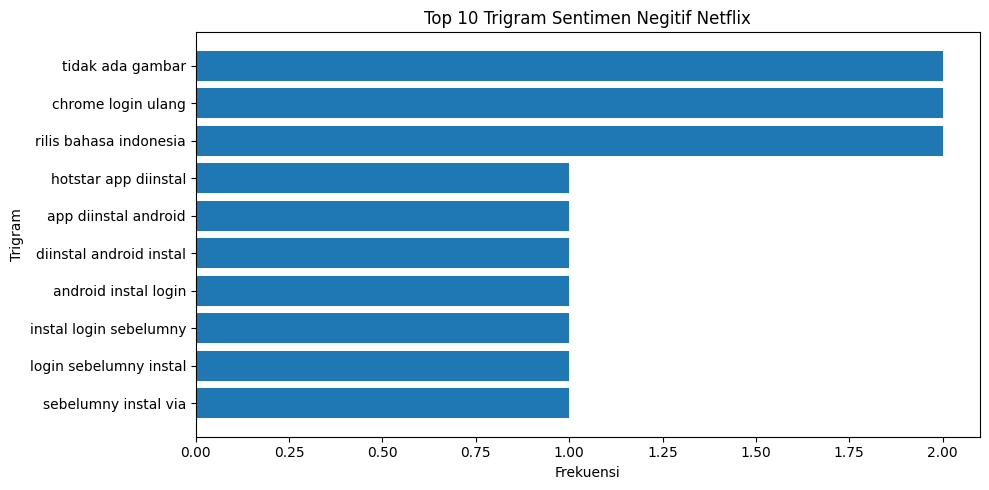

In [ ]:
netral_trigram_df = ngram_to_df(netral_trigram_disneyplus, "Trigram")
plot_ngram_bar(
    netral_trigram_df,
    "Top 10 Trigram Sentimen Negitif Netflix",
    "Trigram"
)